In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
x=tf.placeholder(tf.float32,[None,784])
y=tf.palceholedr(tf.float32,[None,10])

In [16]:
# 소프트 맥스 분류
def softmax_classify(x):
    w=tf.Variable(tf.random_normal([784,10]))
    b=tf.Variable(tf.random_normal([10]))
    pred_y=tf.nn.softmax(tf.matmul(x,w)+b)
    
    return pred_y

In [10]:
pred_y=softmax_classify(x)

In [12]:
# 손실함수 및 최적화
loss=tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred_y),reduction_indices=[1]))
optimizer=tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [15]:
# 그래피 실행 및 정확도 출력
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    for i in range(1000):
        batch_xs,batch_ys=mnist.train.next_batch(100)
        sess.run(optimizer,feed_dict={x:batch_xs,y:batch_ys})
        
    correction_prediction=tf.equal(tf.argmax(y,1),tf.argmax(pred_y,1))
    accuracy=tf.reduce_mean(tf.cast(correction_prediction,tf.float32))
    print(sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels}))

0.873


Populating the interactive namespace from numpy and matplotlib


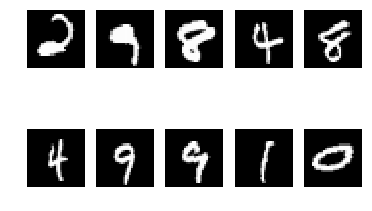

In [17]:
%pylab inline
import numpy as np

# 임의로 선택한 10개의 MNIST 데이터를 화면에 보여준다.
for c in range(1, 11):
    subplot(2, 5, c)
    i = randint(mnist.test.num_examples)
    im = np.reshape(mnist.test.images[i], [28, 28])
    axis("off")
    imshow(im, cmap='gray')